In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
eng_grad_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/training_set_label.csv" )

In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/eng_grad_emp_salary/testing_set_label.csv')

In [4]:
#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
eng_grad_data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [6]:
eng_grad_data.drop(labels = ['ID', 'DOB', 'CollegeID', 'CollegeCityID'], inplace = True, axis = 1)

In [7]:
eng_grad_data.reset_index(inplace = True)
eng_grad_data.drop(labels = ['index'], inplace = True, axis = 1)

In [8]:
eng_grad_data.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [9]:
eng_grad_data['collegeGPA'].value_counts()

72.00    85
70.00    75
75.00    67
65.00    63
76.00    57
         ..
74.79     1
78.53     1
83.43     1
73.84     1
82.67     1
Name: collegeGPA, Length: 1064, dtype: int64

In [10]:
cat_col = ['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier', 'CollegeState', 'GraduationYear']

In [11]:
eng_grad_data.columns

Index(['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary'],
      dtype='object')

In [12]:
con_col = ['10percentage',  '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience','Salary']

In [13]:
cat_col

['Gender',
 '10board',
 '12graduation',
 '12board',
 'CollegeTier',
 'Degree',
 'Specialization',
 'CollegeCityTier',
 'CollegeState',
 'GraduationYear']

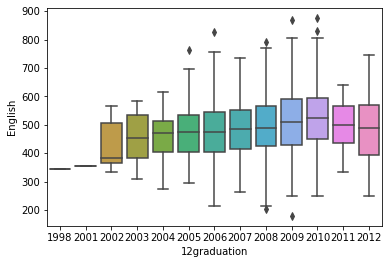

In [14]:
#for i in cat_col[:3]:
sns.boxplot(data = eng_grad_data, x = cat_col[2], y = 'English')

In [15]:
x = eng_grad_data[eng_grad_data['12graduation'] == 2005]

In [23]:
x['English'].mean()

477.33858267716533

In [24]:
x[x['English'] > upper]

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
1879,m,86.8,cbse,2005,62.0,cbse,2,B.Tech/B.E.,computer engineering,71.9,0,Rajasthan,2010,765,605,555,0.735796,475,-1,-1,-1,-1,-1,-1,-1.9629,0.3448,0.3817,-0.0552,1.1343,620000


In [18]:
x[x['English'] > upper]['English']

NameError: name 'upper' is not defined

In [ ]:
eng_grad_data[.replace(to_replace = eng_grad_data['12graduation'] == 2005], value = 477, inplace = True )
eng_grad_data[eng_grad_data['12graduation'] == 2006].replace(to_replace = 825, value = 481, inplace = True )

In [20]:
Q1 = np.quantile(x['English'],0.25)
Q3 = np.quantile(x['English'],0.75)
IQR = Q3 - Q1

In [21]:
IQR

130.0

In [22]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [25]:
from scipy.stats import skew 
skew(x['English'])

0.3234285674849176

In [26]:
for i in 

SyntaxError: invalid syntax (<ipython-input-26-8cbabfbcfb86>, line 1)

In [27]:
f['age'].replace(df.age>75,0,inplace=True)

NameError: name 'f' is not defined

In [28]:
eng_grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   10board                2998 non-null   object 
 3   12graduation           2998 non-null   int64  
 4   12percentage           2998 non-null   float64
 5   12board                2998 non-null   object 
 6   CollegeTier            2998 non-null   int64  
 7   Degree                 2998 non-null   object 
 8   Specialization         2998 non-null   object 
 9   collegeGPA             2998 non-null   float64
 10  CollegeCityTier        2998 non-null   int64  
 11  CollegeState           2998 non-null   object 
 12  GraduationYear         2998 non-null   int64  
 13  English                2998 non-null   int64  
 14  Logical                2998 non-null   int64  
 15  Quan

In [29]:
# for i in eng_grad_data.columns:
#     if eng_grad_data[i].dtype == object:
#         print(eng_grad_data[i].value_counts())

In [30]:
# cat_col = []
# con_col = []
# for i in eng_grad_data.columns:
#     if eng_grad_data[i].dtype == "float64":
#         con_col.append(i)
#     else:
#         cat_col.append(i)

In [31]:
#eng_grad_data.dtypes

In [32]:
eng_grad_data.head(2)

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.8,cbse,2009,84.0,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,m,57.0,cbse,2010,64.5,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


In [33]:
cat_col

['Gender',
 '10board',
 '12graduation',
 '12board',
 'CollegeTier',
 'Degree',
 'Specialization',
 'CollegeCityTier',
 'CollegeState',
 'GraduationYear']

In [34]:
con_col

['10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Salary']

In [35]:
eng_grad_data.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [36]:
eng_grad_data[cat_col[5]].value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [37]:
cat_col #_df.head()

['Gender',
 '10board',
 '12graduation',
 '12board',
 'CollegeTier',
 'Degree',
 'Specialization',
 'CollegeCityTier',
 'CollegeState',
 'GraduationYear']

In [38]:
cat_col_data = pd.DataFrame()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
for i in cat_col:
    cat_col_data[i+'_category'] = labelencoder.fit_transform(eng_grad_data[i])

In [39]:
cat_col_data.head()

,Gender_category,10board_category,12graduation_category,12board_category,CollegeTier_category,Degree_category,Specialization_category,CollegeCityTier_category,CollegeState_category,GraduationYear_category
0,0,46,9,63,0,0,33,1,4,6
1,1,46,10,63,1,0,12,0,23,7
2,1,129,7,5,1,0,19,0,14,4
3,1,46,9,63,0,0,12,1,4,6
4,0,46,8,63,1,0,4,1,20,5


In [40]:
cat_col_data.shape

(2998, 10)

In [41]:
cat_col_df = pd.DataFrame()
for i in cat_col_data.columns:
    a = pd.get_dummies(cat_col_data[i], prefix = i[:6])
    cat_col_df = pd.concat([cat_col_df, a], axis = 1)

In [42]:
cat_col_df.shape

(2998, 600)

In [43]:
cat_col_df.head()

,Gender_0,Gender_1,10boar_0,10boar_1,10boar_2,10boar_3,10boar_4,10boar_5,10boar_6,10boar_7,10boar_8,10boar_9,10boar_10,10boar_11,10boar_12,10boar_13,10boar_14,10boar_15,10boar_16,10boar_17,10boar_18,10boar_19,10boar_20,10boar_21,10boar_22,10boar_23,10boar_24,10boar_25,10boar_26,10boar_27,10boar_28,10boar_29,10boar_30,10boar_31,10boar_32,10boar_33,10boar_34,10boar_35,10boar_36,10boar_37,10boar_38,10boar_39,10boar_40,10boar_41,10boar_42,10boar_43,10boar_44,10boar_45,10boar_46,10boar_47,10boar_48,10boar_49,10boar_50,10boar_51,10boar_52,10boar_53,10boar_54,10boar_55,10boar_56,10boar_57,10boar_58,10boar_59,10boar_60,10boar_61,10boar_62,10boar_63,10boar_64,10boar_65,10boar_66,10boar_67,10boar_68,10boar_69,10boar_70,10boar_71,10boar_72,10boar_73,10boar_74,10boar_75,10boar_76,10boar_77,10boar_78,10boar_79,10boar_80,10boar_81,10boar_82,10boar_83,10boar_84,10boar_85,10boar_86,10boar_87,10boar_88,10boar_89,10boar_90,10boar_91,10boar_92,10boar_93,10boar_94,10boar_95,10boar_96,10boar_97,10boar_98,10boar_99,10boar_100,10boar_101,10boar_102,10boar_103,10boar_104,10boar_105,10boar_106,10boar_107,10boar_108,10boar_109,10boar_110,10boar_111,10boar_112,10boar_113,10boar_114,10boar_115,10boar_116,10boar_117,10boar_118,10boar_119,10boar_120,10boar_121,10boar_122,10boar_123,10boar_124,10boar_125,10boar_126,10boar_127,10boar_128,10boar_129,10boar_130,10boar_131,10boar_132,10boar_133,10boar_134,10boar_135,10boar_136,10boar_137,10boar_138,10boar_139,10boar_140,10boar_141,10boar_142,10boar_143,10boar_144,10boar_145,10boar_146,10boar_147,10boar_148,10boar_149,10boar_150,10boar_151,10boar_152,10boar_153,10boar_154,10boar_155,10boar_156,10boar_157,10boar_158,10boar_159,10boar_160,10boar_161,10boar_162,10boar_163,10boar_164,10boar_165,10boar_166,10boar_167,10boar_168,10boar_169,10boar_170,10boar_171,10boar_172,10boar_173,10boar_174,10boar_175,10boar_176,10boar_177,10boar_178,10boar_179,10boar_180,10boar_181,10boar_182,10boar_183,10boar_184,10boar_185,10boar_186,10boar_187,10boar_188,10boar_189,10boar_190,10boar_191,10boar_192,10boar_193,10boar_194,10boar_195,10boar_196,10boar_197,10boar_198,10boar_199,10boar_200,10boar_201,10boar_202,10boar_203,10boar_204,10boar_205,10boar_206,10boar_207,10boar_208,10boar_209,10boar_210,10boar_211,10boar_212,10boar_213,10boar_214,10boar_215,10boar_216,10boar_217,10boar_218,10boar_219,10boar_220,12grad_0,12grad_1,12grad_2,12grad_3,12grad_4,12grad_5,12grad_6,12grad_7,12grad_8,12grad_9,12grad_10,12grad_11,12grad_12,12boar_0,12boar_1,12boar_2,12boar_3,12boar_4,12boar_5,12boar_6,12boar_7,12boar_8,12boar_9,12boar_10,12boar_11,12boar_12,12boar_13,12boar_14,12boar_15,12boar_16,12boar_17,12boar_18,12boar_19,12boar_20,12boar_21,12boar_22,12boar_23,12boar_24,12boar_25,12boar_26,12boar_27,12boar_28,12boar_29,12boar_30,12boar_31,12boar_32,12boar_33,12boar_34,12boar_35,12boar_36,12boar_37,12boar_38,12boar_39,12boar_40,12boar_41,12boar_42,12boar_43,12boar_44,12boar_45,12boar_46,12boar_47,12boar_48,12boar_49,12boar_50,12boar_51,12boar_52,12boar_53,12boar_54,12boar_55,12boar_56,12boar_57,12boar_58,12boar_59,12boar_60,12boar_61,12boar_62,12boar_63,12boar_64,12boar_65,12boar_66,12boar_67,12boar_68,12boar_69,12boar_70,12boar_71,12boar_72,12boar_73,12boar_74,12boar_75,12boar_76,12boar_77,12boar_78,12boar_79,12boar_80,12boar_81,12boar_82,12boar_83,12boar_84,12boar_85,12boar_86,12boar_87,12boar_88,12boar_89,12boar_90,12boar_91,12boar_92,12boar_93,12boar_94,12boar_95,12boar_96,12boar_97,12boar_98,12boar_99,12boar_100,12boar_101,12boar_102,12boar_103,12boar_104,12boar_105,12boar_106,12boar_107,12boar_108,12boar_109,12boar_110,12boar_111,12boar_112,12boar_113,12boar_114,12boar_115,12boar_116,12boar_117,12boar_118,12boar_119,12boar_120,12boar_121,12boar_122,12boar_123,12boar_124,12boar_125,12boar_126,12boar_127,12boar_128,12boar_129,12boar_130,12boar_131,12boar_132,12boar_133,12boar_134,12boar_135,12boar_136,12boar_137,12boar_138,12boar_139,12boar_140,12boar_141,12boar_142,12boar_143,12boar_144,12boar_145,12boar_146,12boar_147,12boar_148,12boar_149,

In [44]:
con_col

['10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Salary']

In [45]:
con_data = eng_grad_data[con_col]

In [46]:
con_data['Salary'] = con_data['Salary'].apply(lambda x:x/10000)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
con_data.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,87.80,84.00,73.82,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,44.5
1,57.00,64.50,65.00,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,11.0
2,77.33,85.17,61.94,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,25.5
3,84.30,86.00,80.40,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,42.0
4,82.00,75.00,64.30,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,20.0


In [48]:
con_data.corr()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
10percentage,1.000000,0.645578,0.311209,0.348452,0.309558,0.328888,0.079927,0.052249,0.091123,-0.013196,0.053343,0.065815,0.049500,0.021410,0.066644,0.136332,-0.007811,-0.131151,0.034869,0.181414
12percentage,0.645578,1.000000,0.335041,0.211218,0.237480,0.316400,0.073431,0.070979,0.130723,-0.046259,0.041109,0.065761,0.055003,0.002204,0.057277,0.099645,-0.012765,-0.088635,0.007041,0.172755
collegeGPA,0.311209,0.335041,1.000000,0.100617,0.192549,0.219545,0.091883,0.138592,0.031423,0.000075,-0.040812,0.056289,-0.002096,-0.039379,0.052435,0.060789,-0.050995,-0.067701,0.013691,0.131912
English,0.348452,0.211218,0.100617,1.000000,0.441358,0.375415,0.097777,0.128537,0.019831,0.072639,-0.005057,0.022872,0.001632,-0.028576,0.028773,0.191400,0.007065,-0.148064,0.073529,0.179668
Logical,0.309558,0.237480,0.192549,0.441358,1.000000,0.511049,0.178285,0.179326,0.004572,0.056551,-0.015491,0.008607,-0.005502,-0.027270,0.018574,0.159086,-0.006037,-0.187744,0.049579,0.193647
Quant,0.328888,0.316400,0.219545,0.375415,0.511049,1.000000,0.219296,0.146238,0.121459,-0.026077,0.002042,0.028883,0.034318,-0.023578,-0.008469,0.102118,-0.039292,-0.143809,0.024627,0.239345
Domain,0.079927,0.073431,0.091883,0.097777,0.178285,0.219296,1.000000,0.308296,0.092298,0.072620,0.044702,0.035305,0.024405,0.013898,-0.051190,0.039911,-0.033414,-0.026953,-0.000347,0.132845
ComputerProgramming,0.052249,0.070979,0.138592,0.128537,0.179326,0.146238,0.308296,1.000000,-0.354462,0.262633,-0.309653,-0.135128,-0.239614,-0.071833,0.006295,0.074458,0.046697,-0.092852,0.045786,0.134235
ElectronicsAndSemicon,0.091123,0.130723,0.031423,0.019831,0.004572,0.121459,0.092298,-0.354462,1.000000,-0.286227,-0.107129,0.026905,0.372510,0.024206,-0.024268,-0.023602,-0.047400,0.013229,-0.009443,-0.008085
ComputerScience,-0.013196,-0.046259,0.000075,0.072639,0.056551,-0.026077,0.072620,0.262633,-0.286227,1.000000,-0.130261,-0.086535,-0.149969,-0.048933,0.064505,0.033919,0.090258,-0.110483,0.043380,-0.099373


In [49]:
con_data.columns

Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [50]:
names = con_col[:-1]
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(con_data[names])
scaled_df = pd.DataFrame(scaled_data, columns=names)

In [51]:
scaled_df.shape

(2998, 19)

In [52]:
scaled_df.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.013260,0.868731,0.284462,1.414550,1.885408,2.421635,0.401518,0.651034,1.699765,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,-0.117375,0.264404,1.296849,0.288196,0.427036
1,-2.066396,-0.885111,-0.801597,-0.580000,-0.749629,-2.489370,-0.358610,0.064215,-0.612610,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,1.143941,-0.084042,1.296849,0.663714,-0.143787
2,-0.033623,0.973962,-1.178393,-0.152596,-0.291362,-0.074793,0.682520,-1.725585,1.913990,-0.535271,-0.251971,-0.200695,2.211137,-0.091418,0.535434,-0.260986,1.611850,-0.142422,-0.145376
3,0.663300,1.048612,1.094696,1.651996,1.369857,0.989259,1.039403,1.482362,-0.612610,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,-0.397721,0.090181,0.338753,0.413401,0.617311
4,0.433325,0.059265,-0.887792,0.702211,-0.062228,-1.220694,-0.496443,-0.180293,-0.612610,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,-1.425138,-0.914035,-1.102338,0.205578,0.325245


In [53]:
# final_df = pd.concat([cat_col_df,scaled_df], axis = 1)
final_df = pd.concat([scaled_df,con_data], axis = 1)

In [102]:
final_df.shape

(2998, 39)

# Evaluation on Required test_data

In [55]:
test_data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,239903,m,1989-09-25,92.8,0,2007,88.66,0,1866,2,B.Tech/B.E.,electronics & telecommunications,84.13,1866,1,Karnataka,2011,355,505,615,0.824666,425,400,-1,-1,-1,473,-1,-1.1901,-0.4353,-2.0856,2.0599,-0.2875
1,948661,m,1991-03-07,75.0,icse,2010,67.75,nios,13209,2,B.Tech/B.E.,computer science & engineering,72.90,13209,0,West Bengal,2014,415,280,365,0.911395,285,-1,500,-1,-1,-1,-1,-0.8772,-0.4536,0.6248,-0.1076,0.6721
2,390079,m,1991-02-17,79.2,karnataka secondary education examination board,2008,59.00,department of pre-university eduction,6575,2,M.Tech./M.E.,computer engineering,73.00,6575,1,Karnataka,2014,395,505,334,0.525923,415,-1,-1,-1,-1,-1,-1,1.4374,0.5008,-0.3803,0.6498,0.6603
3,580714,f,1991-09-24,83.2,cbse,2009,80.40,cbse,8195,1,B.Tech/B.E.,computer science & engineering,73.80,8195,1,Delhi,2013,605,610,560,0.843124,515,-1,-1,-1,-1,-1,-1,-1.3080,1.0449,0.0100,0.3995,-0.4776
4,335896,m,1991-08-17,85.4,0,2008,88.70,0,1141,2,B.Tech/B.E.,electronics and communication engineering,62.00,1141,0,Andhra Pradesh,2012,455,425,545,0.538387,-1,333,-1,-1,-1,286,-1,0.7419,1.9048,-0.0537,0.0035,-0.2875


In [56]:
test_data.drop(labels = ['ID', 'DOB', 'CollegeID', 'CollegeCityID'], inplace = True, axis = 1)

In [57]:
test_data.reset_index(inplace = True)
test_data.drop(labels = ['index'], inplace = True, axis = 1)

In [58]:
cat_col

['Gender',
 '10board',
 '12graduation',
 '12board',
 'CollegeTier',
 'Degree',
 'Specialization',
 'CollegeCityTier',
 'CollegeState',
 'GraduationYear']

In [59]:
con_col

['10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Salary']

In [60]:
cat_col_data_test = pd.DataFrame()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
for i in cat_col:
    cat_col_data_test[i+'_category'] = labelencoder.fit_transform(eng_grad_data[i])

In [61]:
cat_col_data_test.columns

Index(['Gender_category', '10board_category', '12graduation_category',
       '12board_category', 'CollegeTier_category', 'Degree_category',
       'Specialization_category', 'CollegeCityTier_category',
       'CollegeState_category', 'GraduationYear_category'],
      dtype='object')

In [62]:
cat_col_df_test = pd.DataFrame()
for i in cat_col_data_test.columns:
    a = pd.get_dummies(cat_col_data[i], prefix = i[:6])
    cat_col_df_test = pd.concat([cat_col_df_test, a], axis = 1)

In [63]:
cat_col_df_test.head()

,Gender_0,Gender_1,10boar_0,10boar_1,10boar_2,10boar_3,10boar_4,10boar_5,10boar_6,10boar_7,10boar_8,10boar_9,10boar_10,10boar_11,10boar_12,10boar_13,10boar_14,10boar_15,10boar_16,10boar_17,10boar_18,10boar_19,10boar_20,10boar_21,10boar_22,10boar_23,10boar_24,10boar_25,10boar_26,10boar_27,10boar_28,10boar_29,10boar_30,10boar_31,10boar_32,10boar_33,10boar_34,10boar_35,10boar_36,10boar_37,10boar_38,10boar_39,10boar_40,10boar_41,10boar_42,10boar_43,10boar_44,10boar_45,10boar_46,10boar_47,10boar_48,10boar_49,10boar_50,10boar_51,10boar_52,10boar_53,10boar_54,10boar_55,10boar_56,10boar_57,10boar_58,10boar_59,10boar_60,10boar_61,10boar_62,10boar_63,10boar_64,10boar_65,10boar_66,10boar_67,10boar_68,10boar_69,10boar_70,10boar_71,10boar_72,10boar_73,10boar_74,10boar_75,10boar_76,10boar_77,10boar_78,10boar_79,10boar_80,10boar_81,10boar_82,10boar_83,10boar_84,10boar_85,10boar_86,10boar_87,10boar_88,10boar_89,10boar_90,10boar_91,10boar_92,10boar_93,10boar_94,10boar_95,10boar_96,10boar_97,10boar_98,10boar_99,10boar_100,10boar_101,10boar_102,10boar_103,10boar_104,10boar_105,10boar_106,10boar_107,10boar_108,10boar_109,10boar_110,10boar_111,10boar_112,10boar_113,10boar_114,10boar_115,10boar_116,10boar_117,10boar_118,10boar_119,10boar_120,10boar_121,10boar_122,10boar_123,10boar_124,10boar_125,10boar_126,10boar_127,10boar_128,10boar_129,10boar_130,10boar_131,10boar_132,10boar_133,10boar_134,10boar_135,10boar_136,10boar_137,10boar_138,10boar_139,10boar_140,10boar_141,10boar_142,10boar_143,10boar_144,10boar_145,10boar_146,10boar_147,10boar_148,10boar_149,10boar_150,10boar_151,10boar_152,10boar_153,10boar_154,10boar_155,10boar_156,10boar_157,10boar_158,10boar_159,10boar_160,10boar_161,10boar_162,10boar_163,10boar_164,10boar_165,10boar_166,10boar_167,10boar_168,10boar_169,10boar_170,10boar_171,10boar_172,10boar_173,10boar_174,10boar_175,10boar_176,10boar_177,10boar_178,10boar_179,10boar_180,10boar_181,10boar_182,10boar_183,10boar_184,10boar_185,10boar_186,10boar_187,10boar_188,10boar_189,10boar_190,10boar_191,10boar_192,10boar_193,10boar_194,10boar_195,10boar_196,10boar_197,10boar_198,10boar_199,10boar_200,10boar_201,10boar_202,10boar_203,10boar_204,10boar_205,10boar_206,10boar_207,10boar_208,10boar_209,10boar_210,10boar_211,10boar_212,10boar_213,10boar_214,10boar_215,10boar_216,10boar_217,10boar_218,10boar_219,10boar_220,12grad_0,12grad_1,12grad_2,12grad_3,12grad_4,12grad_5,12grad_6,12grad_7,12grad_8,12grad_9,12grad_10,12grad_11,12grad_12,12boar_0,12boar_1,12boar_2,12boar_3,12boar_4,12boar_5,12boar_6,12boar_7,12boar_8,12boar_9,12boar_10,12boar_11,12boar_12,12boar_13,12boar_14,12boar_15,12boar_16,12boar_17,12boar_18,12boar_19,12boar_20,12boar_21,12boar_22,12boar_23,12boar_24,12boar_25,12boar_26,12boar_27,12boar_28,12boar_29,12boar_30,12boar_31,12boar_32,12boar_33,12boar_34,12boar_35,12boar_36,12boar_37,12boar_38,12boar_39,12boar_40,12boar_41,12boar_42,12boar_43,12boar_44,12boar_45,12boar_46,12boar_47,12boar_48,12boar_49,12boar_50,12boar_51,12boar_52,12boar_53,12boar_54,12boar_55,12boar_56,12boar_57,12boar_58,12boar_59,12boar_60,12boar_61,12boar_62,12boar_63,12boar_64,12boar_65,12boar_66,12boar_67,12boar_68,12boar_69,12boar_70,12boar_71,12boar_72,12boar_73,12boar_74,12boar_75,12boar_76,12boar_77,12boar_78,12boar_79,12boar_80,12boar_81,12boar_82,12boar_83,12boar_84,12boar_85,12boar_86,12boar_87,12boar_88,12boar_89,12boar_90,12boar_91,12boar_92,12boar_93,12boar_94,12boar_95,12boar_96,12boar_97,12boar_98,12boar_99,12boar_100,12boar_101,12boar_102,12boar_103,12boar_104,12boar_105,12boar_106,12boar_107,12boar_108,12boar_109,12boar_110,12boar_111,12boar_112,12boar_113,12boar_114,12boar_115,12boar_116,12boar_117,12boar_118,12boar_119,12boar_120,12boar_121,12boar_122,12boar_123,12boar_124,12boar_125,12boar_126,12boar_127,12boar_128,12boar_129,12boar_130,12boar_131,12boar_132,12boar_133,12boar_134,12boar_135,12boar_136,12boar_137,12boar_138,12boar_139,12boar_140,12boar_141,12boar_142,12boar_143,12boar_144,12boar_145,12boar_146,12boar_147,12boar_148,12boar_149,

In [64]:
cat_col_df_test.shape

(2998, 600)

In [65]:
con_data_test = test_data[con_col[:-1]]

In [66]:
names_test = con_col[:-1]
# Create the Scaler object
scaler_test = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data_test = scaler_test.fit_transform(con_data_test[names_test])
scaled_df_test = pd.DataFrame(scaled_data_test, columns=names_test)

In [67]:
scaled_df_test.columns

Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [68]:
# final_df = pd.concat([cat_col_df,scaled_df], axis = 1)
final_df_test = pd.concat([scaled_df_test,con_data_test], axis = 1)

In [69]:
final_df_test.shape

(1000, 38)

In [70]:
final_df_test.columns

Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', '10percentage', '12percentage',
       'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [101]:
final_df_test.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.510203,1.300860,1.531914,-1.429353,-0.001151,0.847495,0.636339,0.328222,1.961353,-0.487925,-0.220559,-0.196819,4.039727,-0.124251,-1.110873,-0.717486,-2.316866,2.325440,-0.156689,92.8,88.66,84.13,355,505,615,0.824666,425,400,-1,-1,-1,473,-1,-1.1901,-0.4353,-2.0856,2.0599,-0.2875
1,-0.396627,-0.667662,0.178897,-0.851432,-2.644461,-1.191733,0.815475,-0.345577,-0.597469,2.510178,-0.220559,-0.196819,-0.324042,-0.124251,-0.809905,-0.737919,0.641576,0.132143,0.792626,75.0,67.75,72.90,415,280,365,0.911395,285,-1,500,-1,-1,-1,-1,-0.8772,-0.4536,0.6248,-0.1076,0.6721
2,0.053299,-1.491410,0.190945,-1.044072,-0.001151,-1.444598,0.019293,0.280093,-0.597469,-0.487925,-0.220559,-0.196819,-0.324042,-0.124251,1.416429,0.327717,-0.455505,0.898558,0.780952,79.2,59.00,73.00,395,505,334,0.525923,415,-1,-1,-1,-1,-1,-1,1.4374,0.5008,-0.3803,0.6498,0.6603
3,0.481800,0.523242,0.287331,0.978652,1.232393,0.398865,0.674462,0.761378,-0.597469,-0.487925,-0.220559,-0.196819,-0.324042,-0.124251,-1.224276,0.935232,-0.029487,0.645279,-0.344751,83.2,80.40,73.80,605,610,560,0.843124,515,-1,-1,-1,-1,-1,-1,-1.3080,1.0449,0.0100,0.3995,-0.4776
4,0.717476,1.304626,-1.134360,-0.466151,-0.940995,0.276511,0.045038,-1.722052,1.533819,-0.487925,-0.220559,-0.196819,2.318156,-0.124251,0.747451,1.895354,-0.099016,0.244566,-0.156689,85.4,88.70,62.00,455,425,545,0.538387,-1,333,-1,-1,-1,286,-1,0.7419,1.9048,-0.0537,0.0035,-0.2875


# Model Evaluation

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [90]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [91]:
# X = final_df_test.iloc[:,:-1]
# y = final_df_test.iloc[:,-1]

In [92]:
y.head()

0    44.5
1    11.0
2    25.5
3    42.0
4    20.0
Name: Salary, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn import ensemble

In [94]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

In [95]:
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_training_set, y_training_set)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
# from sklearn.metrics import mean_squared_error, r2_score
# model_score = model.score(x_training_set,y_training_set)
# # Have a look at R sq to give an idea of the fit ,
# # Explained variance score: 1 is perfect prediction
# print('R2 sq: ',model_score)
# y_predicted = model.predict(x_test_set)

# # The mean squared error
# print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# # Explained variance score: 1 is perfect prediction
# print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

# # R2 sq:  0.9798997042218072
# # Mean squared error: 5.83
# # Test Variance score: 0.91

R2 sq:  0.6822624095835021
Mean squared error: 182.58
Test Variance score: 0.11


In [106]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(final_df_test)

# # The mean squared error
# print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# # Explained variance score: 1 is perfect prediction
# print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

# # R2 sq:  0.9798997042218072
# # Mean squared error: 5.83
# # Test Variance score: 0.91

R2 sq:  0.6822624095835021


In [108]:
y_predicted_2 = y_predicted*10000

In [112]:
y_predicted_3 = y_predicted_2.round()

In [113]:
res = pd.DataFrame(y_predicted_3) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_employement.csv")  

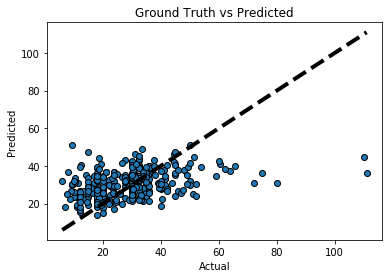

In [99]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()